In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import KMeansClustering
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

# MKT

# Kmeans

(1792, 37)


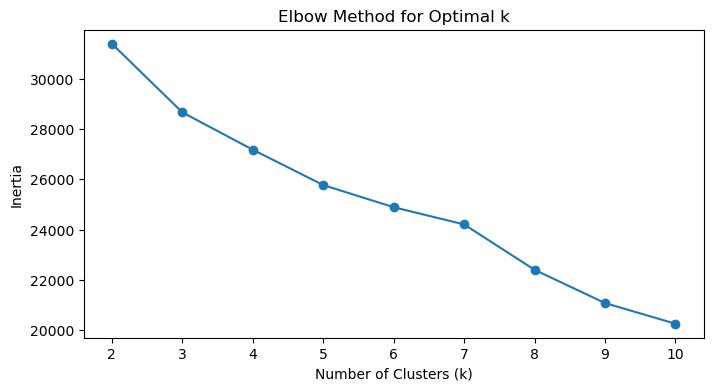

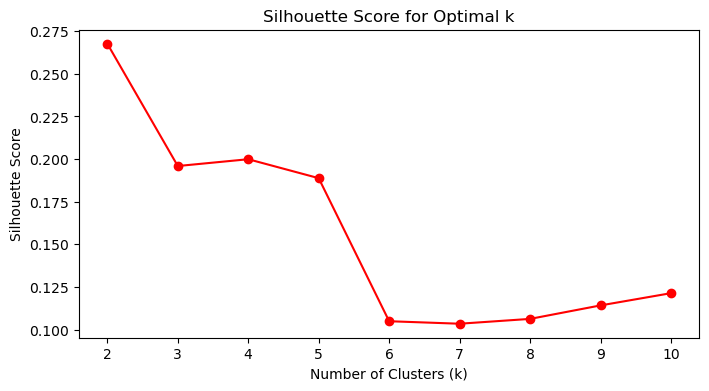

Best k selected: 2


In [3]:
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/train.csv"
df = pd.read_csv(dataset_path)
print(df.shape)

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeansClustering(n_clusters=k)
    labels = model.fit(df)
    inertia.append(model.inertia_)
    silhouette_scores.append(model.silhouette_score())

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k selected: {best_k}")


Results saved to ../datasets/clustering/mkt_kmeans_train.csv
Model saved to ../model_checkpoints/mkt_kmeans_model.pkl


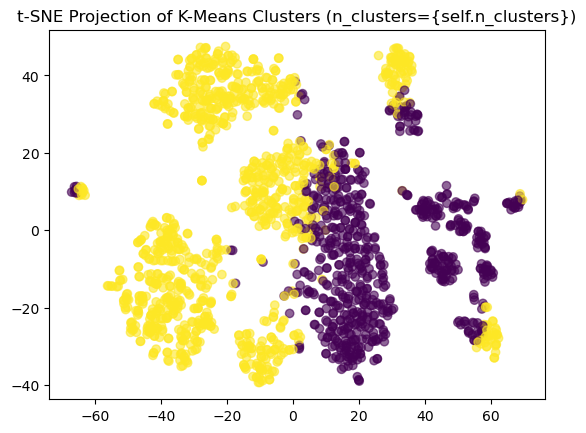

In [4]:

kmeans = KMeansClustering(n_clusters=best_k, save_data=True)
labels = kmeans.fit(df)

kmeans.save_results()
kmeans.save_model()

kmeans.plot_clusters()

In [5]:
dataset_path = "../datasets/cleaned_data/mkt_camp_v1/test.csv"
df = pd.read_csv(dataset_path)

KMeansClustering.inference("../model_checkpoints/mkt_kmeans_model.pkl", df)

Loading model from ../model_checkpoints/mkt_kmeans_model.pkl...
Model loaded successfully!
Inference results saved to ../datasets/clustering/mkt_kmeans_test.csv


# EM

# Spotify

# Kmeans

# EM